BAGGING AND BOOSTING TASKS (DIABETES PREDICTION)

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [36]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
print(df.shape)
print(df.columns)

(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [39]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [41]:
df.duplicated().sum()

np.int64(0)

In [42]:
for i in df.columns:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR
  outlier=((df[i]<lower) | (df[i]>upper)).sum()
  print(f'{i}: {outlier} outliers')

Pregnancies: 4 outliers
Glucose: 5 outliers
BloodPressure: 45 outliers
SkinThickness: 1 outliers
Insulin: 34 outliers
BMI: 19 outliers
DiabetesPedigreeFunction: 29 outliers
Age: 9 outliers
Outcome: 0 outliers


In [43]:
cols_with_zero=['Insulin','BloodPressure','SkinThickness','Glucose','BMI']
df[cols_with_zero]=df[cols_with_zero].replace(0,np.nan)
df[cols_with_zero]=df[cols_with_zero].fillna(df[cols_with_zero].median())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


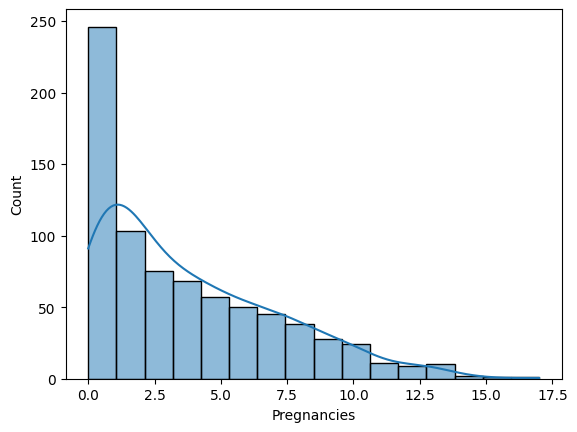

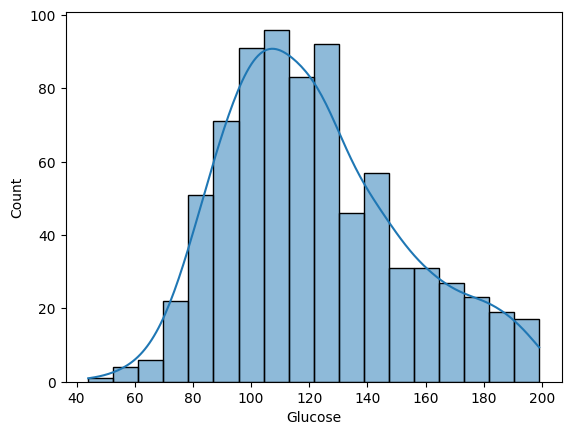

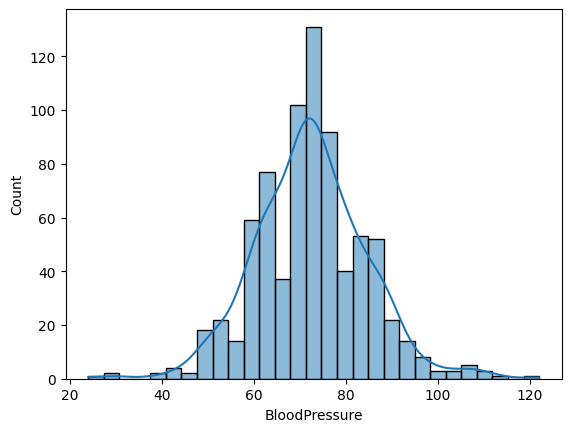

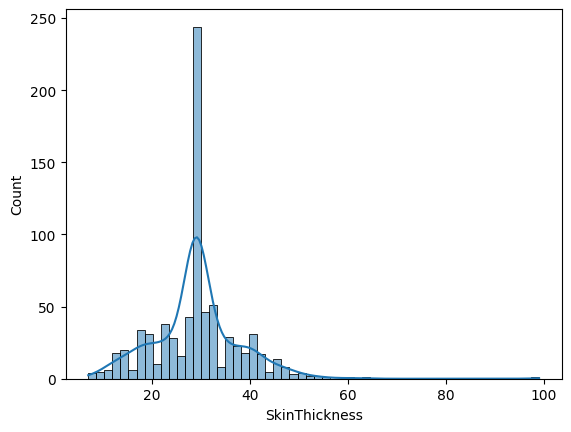

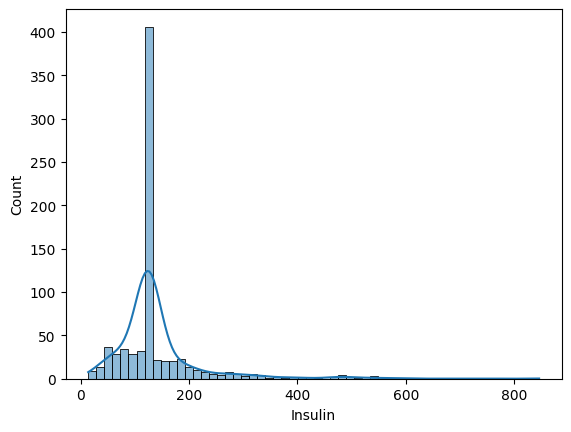

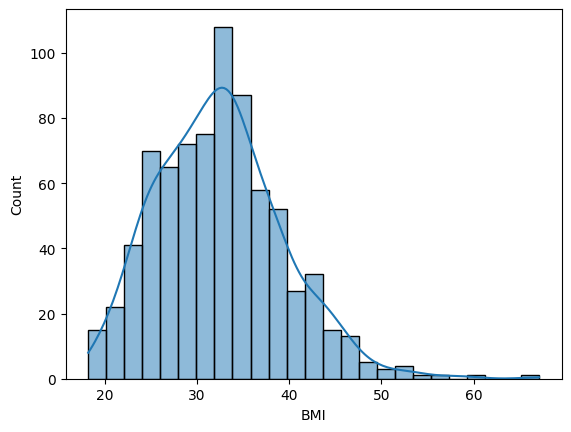

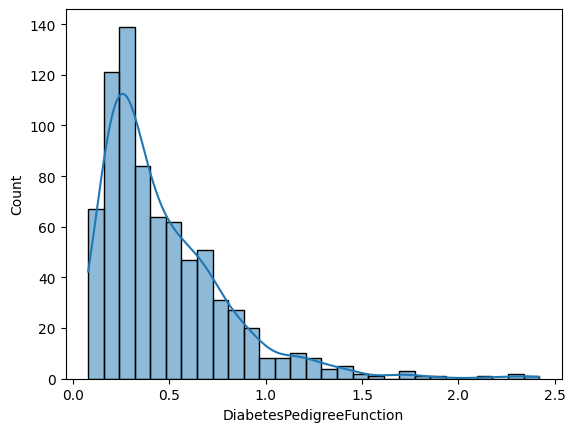

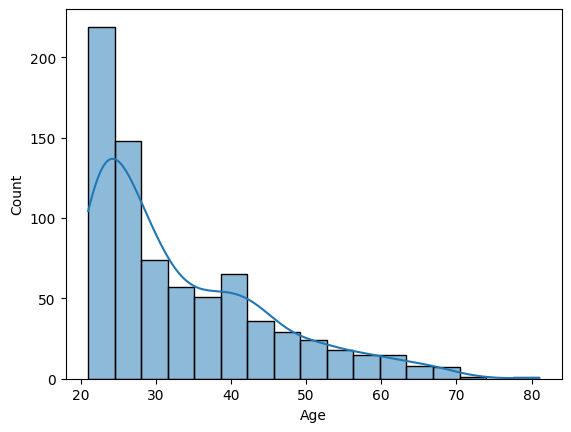

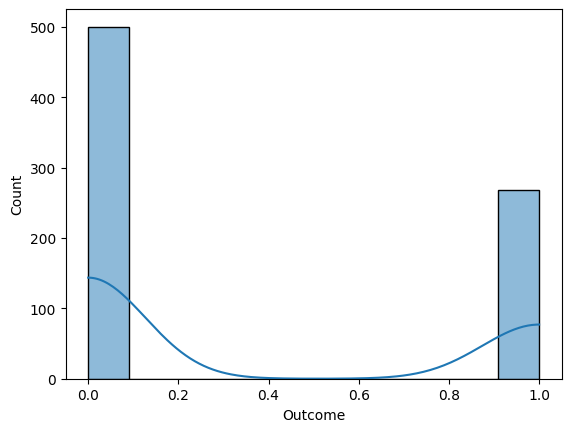

In [44]:
for i in df.columns:
  sns.histplot(df[i],kde=True)
  plt.show()

In [45]:
for i in df.columns:
  print(f'{i}: {df[i].skew()}')

Pregnancies: 0.9016739791518588
Glucose: 0.5355873034111183
BloodPressure: 0.1418850201030565
SkinThickness: 0.8376083316006523
Insulin: 3.380019128212173
BMI: 0.599232520287425
DiabetesPedigreeFunction: 1.919911066307204
Age: 1.1295967011444805
Outcome: 0.635016643444986


In [46]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


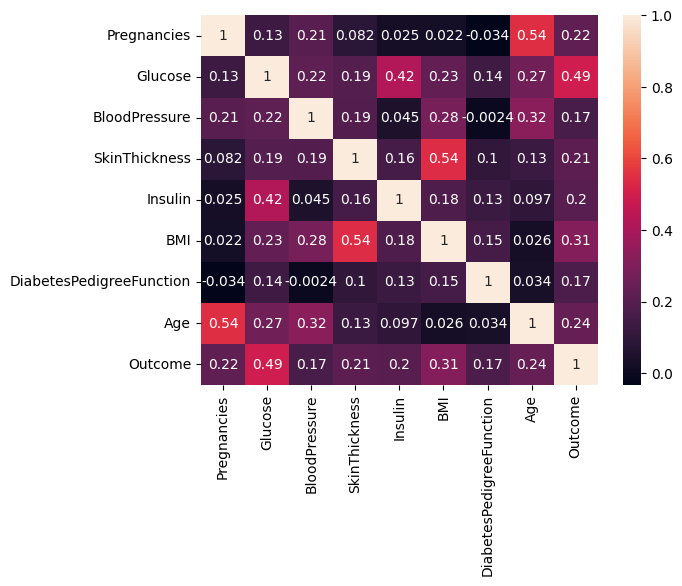

In [47]:
sns.heatmap(df.corr(),annot=True)
plt.savefig('plots/heatmap.png')

In [48]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [49]:
y.value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [52]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
y_pred=model.predict(X_test)
y_prob=model.predict_proba(X_test)[:,1]   #gives probabilities for both classes (0 → non-diabetic, 1 → diabetic)
#ROC AUC needs the probability of the positive class (diabetic = 1), we take column 1 with [:, 1]

print(f'Accuracy: {accuracy_score(y_test,y_pred)}')
print(f'Precision: {precision_score(y_test,y_pred)}')
print(f'Recall: {recall_score(y_test,y_pred)}')
print(f'f1 score: {f1_score(y_test,y_pred)}')
print(f'ROC AUC score: {roc_auc_score(y_test,y_prob)}')
print(f'Confusion matrix: {confusion_matrix(y_test,y_pred)}')

Accuracy: 0.7142857142857143
Precision: 0.5873015873015873
Recall: 0.6727272727272727
f1 score: 0.6271186440677966
ROC AUC score: 0.7774104683195593
Confusion matrix: [[73 26]
 [18 37]]


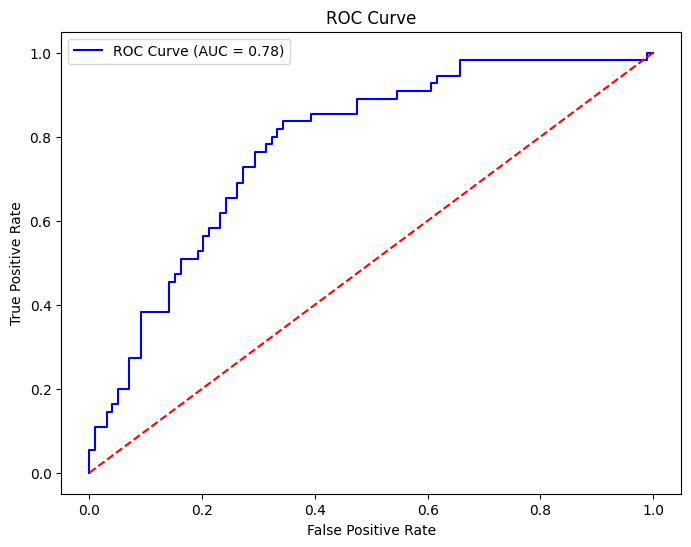

In [61]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_prob)

auc_score=roc_auc_score(y_test,y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('plots/roc_curve.png')
plt.show()

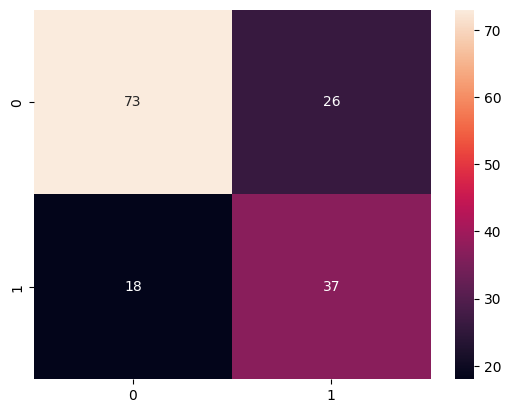

In [54]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.savefig('plots/heatmap1.png')

In [55]:
param_grid={
  'max_depth': [2,3,5],
  'learning_rate': [0.1,0.2,0.01],
  'n_estimators': [50,80,100],
}

In [56]:
from sklearn.model_selection import GridSearchCV

#grid search --> tries all possible combinations of the hyperparameters. Here there are 3*3*3=27 combinations
#For each combinations out of 27, it computes the accuracy 5(cv=5) times and averages it
#scoring='accuracy' --> it averages the 5 accuracy scores and the combination with the highest average accuracy is selected as the best
grid=GridSearchCV(model,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.1, 0.2, ...], 'max_depth': [2, 3, ...], 'n_estimators': [50, 80, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [57]:
y_pred_grid=grid.predict(X_test)
y_prob_grid=grid.predict_proba(X_test)[:,1]

print(f'Accuracy: {accuracy_score(y_test,y_pred_grid)}')
print(f'Precision: {precision_score(y_test,y_pred_grid)}')
print(f'Recall: {recall_score(y_test,y_pred_grid)}')
print(f'f1 score: {f1_score(y_test,y_pred_grid)}')
print(f'ROC AUC score: {roc_auc_score(y_test,y_prob_grid)}')
print(f'Confusion matrix: {confusion_matrix(y_test,y_pred_grid)}')

Accuracy: 0.7467532467532467
Precision: 0.6428571428571429
Recall: 0.6545454545454545
f1 score: 0.6486486486486487
ROC AUC score: 0.8165289256198347
Confusion matrix: [[79 20]
 [19 36]]


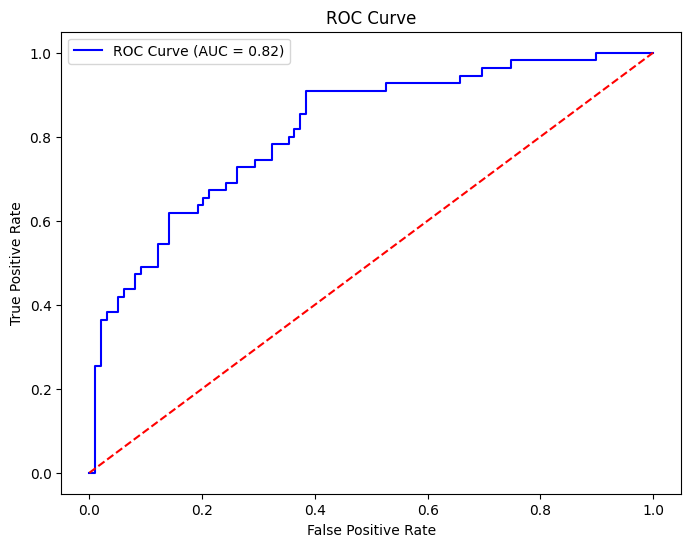

In [58]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob_grid)

auc_score=roc_auc_score(y_test,y_prob_grid)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('plots/roc_curve1.png.png')
plt.show()

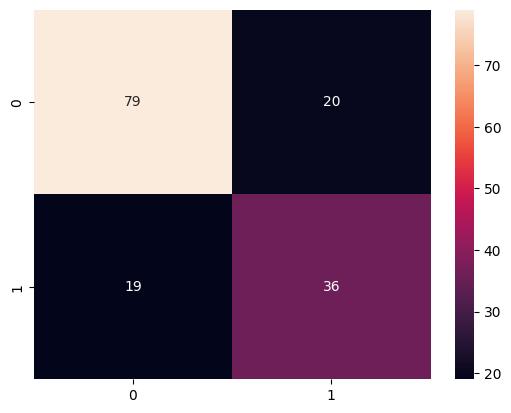

In [59]:
sns.heatmap(confusion_matrix(y_test,y_pred_grid),annot=True)
plt.savefig('plots/heatmap2.png')

In [60]:
best_model=grid.best_estimator_
import pickle

with open('model.pkl','wb') as fp:
  pickle.dump(best_model,fp)